# Import Libraries

In [2]:
import numpy as np
import pandas as pd


# Import Data

In [4]:
# Import data.
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv')
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv')
feature_df = pd.read_csv('feature.csv')

# Explore Data

In [6]:
inputs = pd.concat([loan_data_inputs_train, loan_data_inputs_test], axis=0)

In [7]:
inputs = inputs[inputs['loan_status'].isin(['Charged Off','Does not meet the credit policy. Status:Charged Off'])]
# Here we take only the accounts that were charged-off (written-off).

In [8]:
pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [9]:
inputs.shape

(57475, 198)

In [10]:
inputs.isnull().sum()

Unnamed: 0                               0
id                                       0
loan_amnt                                0
funded_amnt                              0
funded_amnt_inv                          0
term                                     0
int_rate                                 0
installment                              0
grade                                    0
sub_grade                                0
emp_length                               0
home_ownership                           0
annual_inc                               0
verification_status                      0
issue_d                                  0
loan_status                              0
purpose                                  0
addr_state                               0
dti                                      0
delinq_2yrs                              0
earliest_cr_line                         0
fico_range_low                           0
fico_range_high                          0
inq_last_6m

# Dependent Variables

In [12]:
inputs['recovery_rate'] = inputs['recoveries'] / inputs['funded_amnt']
# We calculate the dependent variable for the LGD model: recovery rate.
# It is the ratio of recoveries and funded amount.

In [13]:
inputs['recovery_rate'].describe()
# Shows some descriptive statisics for the values of a column.

count    57475.000000
mean         0.077137
std          0.096184
min          0.000000
25%          0.000000
50%          0.064841
75%          0.112922
max          1.234850
Name: recovery_rate, dtype: float64

In [14]:
inputs['recovery_rate'] = np.where(inputs['recovery_rate'] > 1, 1, inputs['recovery_rate'])
inputs['recovery_rate'] = np.where(inputs['recovery_rate'] < 0, 0, inputs['recovery_rate'])
# We set recovery rates that are greater than 1 to 1 and recovery rates that are less than 0 to 0.

In [15]:
inputs['recovery_rate'].describe()
# Shows some descriptive statisics for the values of a column.

count    57475.000000
mean         0.077116
std          0.095963
min          0.000000
25%          0.000000
50%          0.064841
75%          0.112922
max          1.000000
Name: recovery_rate, dtype: float64

# Explore Dependent Variables

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(array([1.9786e+04, 1.0300e+03, 1.2280e+03, 1.6750e+03, 1.7560e+03,
        2.2380e+03, 2.2400e+03, 2.8050e+03, 3.2450e+03, 3.5680e+03,
        2.7650e+03, 2.5840e+03, 2.6710e+03, 2.3300e+03, 1.0900e+03,
        7.3000e+02, 6.5000e+02, 5.8400e+02, 4.3300e+02, 3.6500e+02,
        3.6100e+02, 2.5800e+02, 1.8200e+02, 1.6500e+02, 1.3000e+02,
        1.1500e+02, 1.2300e+02, 1.1100e+02, 1.3100e+02, 9.4000e+01,
        1.1500e+02, 1.1800e+02, 1.1200e+02, 1.1500e+02, 1.2300e+02,
        1.2300e+02, 8.8000e+01, 8.8000e+01, 1.0600e+02, 9.1000e+01,
        9.4000e+01, 8.8000e+01, 7.4000e+01, 5.6000e+01, 5.9000e+01,
        5.7000e+01, 4.6000e+01, 3.9000e+01, 2.4000e+01, 2.4000e+01,
        3.8000e+01, 3.0000e+01, 2.8000e+01, 1.5000e+01, 1.6000e+01,
        1.7000e+01, 9.0000e+00, 1.3000e+01, 6.0000e+00, 9.0000e+00,
        1.5000e+01, 6.0000e+00, 7.0000e+00, 8.0000e+00, 4.0000e+00,
        1.2000e+01, 4.0000e+00, 5.0000e+00, 9.0000e+00, 1.0000e+00,
        5.0000e+00, 2.0000e+00, 9.0000e+00, 2.00

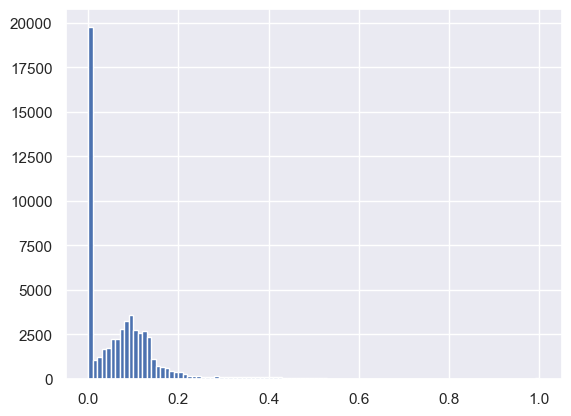

In [18]:
plt.hist(inputs['recovery_rate'], bins = 100)
# We plot a histogram of a variable with 100 bins.

(array([2.0816e+04, 2.9030e+03, 3.9940e+03, 5.0450e+03, 6.8130e+03,
        5.3490e+03, 5.0010e+03, 1.8200e+03, 1.2340e+03, 7.9800e+02,
        6.1900e+02, 3.4700e+02, 2.4500e+02, 2.3400e+02, 2.2500e+02,
        2.3300e+02, 2.2700e+02, 2.4600e+02, 1.7600e+02, 1.9700e+02,
        1.8200e+02, 1.3000e+02, 1.1600e+02, 8.5000e+01, 4.8000e+01,
        6.8000e+01, 4.3000e+01, 3.3000e+01, 2.2000e+01, 1.5000e+01,
        2.1000e+01, 1.5000e+01, 1.6000e+01, 9.0000e+00, 1.0000e+01,
        7.0000e+00, 1.1000e+01, 1.0000e+01, 1.0000e+01, 1.1000e+01,
        6.0000e+00, 6.0000e+00, 1.1000e+01, 5.0000e+00, 6.0000e+00,
        5.0000e+00, 7.0000e+00, 5.0000e+00, 9.0000e+00, 3.1000e+01]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

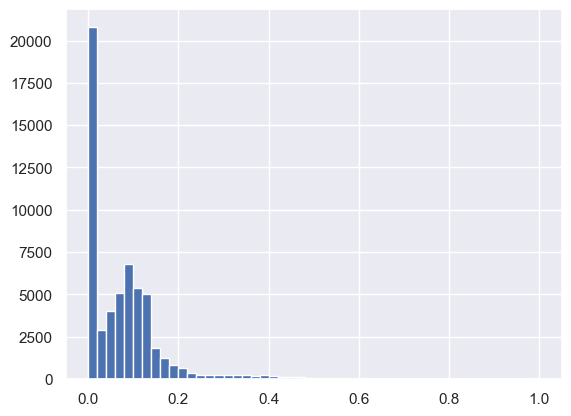

In [19]:
plt.hist(inputs['recovery_rate'], bins = 50)
# We plot a histogram of a variable with 50 bins.

In [20]:
inputs['recovery_rate_0_1'] = np.where(inputs['recovery_rate'] == 0, 0, 1)
# We create a new variable which is 0 if recovery rate is 0 and 1 otherwise.

(array([17031.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 40444.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

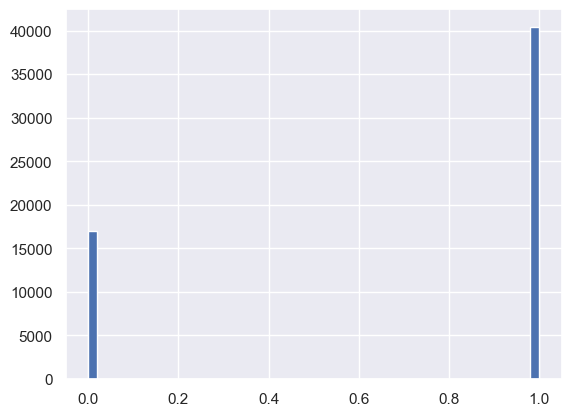

In [21]:
plt.hist(inputs['recovery_rate_0_1'], bins = 50)
# We plot a histogram of a variable with 50 bins.

### Beta regression for LGD

In [23]:
feature_name = feature_df.to_numpy()
feature_name = feature_name.flatten().tolist()
feature_name

['grade_woe',
 'home_ownership_woe',
 'addr_state_woe',
 'loan_amnt_scaled',
 'int_rate_scaled',
 'installment_scaled',
 'annual_inc_scaled',
 'fico_range_high_scaled',
 'inq_last_6mths_scaled',
 'mths_since_last_delinq_scaled',
 'mths_since_last_record_scaled',
 'revol_bal_scaled',
 'revol_util_scaled',
 'out_prncp_inv_scaled',
 'total_pymnt_inv_scaled',
 'total_rec_prncp_scaled',
 'last_pymnt_amnt_scaled',
 'last_fico_range_high_scaled',
 'last_fico_range_low_scaled',
 'open_il_12m_scaled',
 'total_bal_il_scaled',
 'il_util_scaled',
 'total_rev_hi_lim_scaled',
 'total_cu_tl_scaled',
 'bc_open_to_buy_scaled',
 'bc_util_scaled',
 'mo_sin_old_il_acct_scaled',
 'mo_sin_old_rev_tl_op_scaled',
 'mo_sin_rcnt_rev_tl_op_scaled',
 'mo_sin_rcnt_tl_scaled',
 'mths_since_recent_bc_scaled',
 'mths_since_recent_bc_dlq_scaled',
 'mths_since_recent_revol_delinq_scaled',
 'num_accts_ever_120_pd_scaled',
 'num_actv_bc_tl_scaled',
 'num_bc_sats_scaled',
 'num_bc_tl_scaled',
 'num_tl_120dpd_2m_scaled',
 

In [24]:
# Here, from the dataframe with inputs for testing, we keep the same variables that we used in our final PD model.
inputs = inputs.loc[: , feature_name + ['recovery_rate']]
inputs.head()

,grade_woe,home_ownership_woe,addr_state_woe,loan_amnt_scaled,int_rate_scaled,installment_scaled,annual_inc_scaled,fico_range_high_scaled,inq_last_6mths_scaled,mths_since_last_delinq_scaled,...,num_tl_120dpd_2m_scaled,num_tl_30dpd_scaled,num_tl_90g_dpd_24m_scaled,num_tl_op_past_12m_scaled,pct_tl_nvr_dlq_scaled,percent_bc_gt_75_scaled,emp_length_int_scaled,term_int_scaled,mths_since_issue_d_scaled,recovery_rate
12,0.684812,1.000000,0.217322,0.137056,0.111414,0.099374,0.000902,0.180995,0.107143,0.096591,...,0.0,0.0,0.0,0.233333,1.000,0.143,1.0,0.0,0.253968,0.000000
16,0.152286,0.177957,0.217322,0.873096,0.579665,0.756554,0.001967,0.158371,0.000000,0.022727,...,0.0,0.0,0.0,0.066667,0.722,0.600,0.4,0.0,0.325397,0.000000
17,0.465864,1.000000,0.476097,0.619289,0.298792,0.484401,0.002213,0.203620,0.071429,0.102273,...,0.0,0.0,0.0,0.066667,0.885,0.222,1.0,0.0,0.277778,0.000000
18,0.297181,0.524021,0.320177,0.365482,0.503701,0.213891,0.000656,0.226244,0.000000,0.000000,...,0.0,0.0,0.0,0.100000,1.000,0.200,1.0,1.0,0.150794,0.246667
26,0.465864,0.177957,0.270120,0.238579,0.337748,0.189613,0.000902,0.158371,0.000000,0.232955,...,0.0,0.0,0.0,0.066667,0.944,1.000,0.0,0.0,0.103175,0.232700


In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.othermod.betareg import BetaModel

# Beta regression typically works  when the target variable is bounded between 0 and 1,
# so we will use 'recovery_rate' in this context, assuming it's bounded between 0 and 1.

# Stage 1: Prepare the data
lgd_inputs, lgd_targets = inputs.drop('recovery_rate', axis = 1), inputs['recovery_rate']
lgd_inputs_train, lgd_inputs_test, lgd_targets_train, lgd_targets_test = train_test_split(lgd_inputs, lgd_targets.clip(1e-6, 1-1e-6), test_size=0.2, random_state=42)

lgd_inputs_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45980 entries, 157840 to 70920
Data columns (total 46 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   grade_woe                              45980 non-null  float64
 1   home_ownership_woe                     45980 non-null  float64
 2   addr_state_woe                         45980 non-null  float64
 3   loan_amnt_scaled                       45980 non-null  float64
 4   int_rate_scaled                        45980 non-null  float64
 5   installment_scaled                     45980 non-null  float64
 6   annual_inc_scaled                      45980 non-null  float64
 7   fico_range_high_scaled                 45980 non-null  float64
 8   inq_last_6mths_scaled                  45980 non-null  float64
 9   mths_since_last_delinq_scaled          45980 non-null  float64
 10  mths_since_last_record_scaled          45980 non-null  float64
 11  re

In [26]:
# Add of an intercept to the input data
lgd_inputs_train = sm.add_constant(lgd_inputs_train)
lgd_inputs_test = sm.add_constant(lgd_inputs_test)

# Stage 2: Create the Beta regression model
beta_model = BetaModel(lgd_targets_train, lgd_inputs_train)

# Ajust the model and get the model summary to check the results
beta_model_fit = beta_model.fit()
print(beta_model_fit.summary())

                              BetaModel Results                               
Dep. Variable:          recovery_rate   Log-Likelihood:             1.6228e+05
Model:                      BetaModel   AIC:                        -3.245e+05
Method:            Maximum Likelihood   BIC:                        -3.241e+05
Date:                Mon, 07 Oct 2024                                         
Time:                        19:51:04                                         
No. Observations:               45980                                         
Df Residuals:                   45932                                         
Df Model:                          46                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6739        nan        nan       

C:\Users\Pierre Pro\anaconda3\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [27]:
# Predicting on the test set
lgd_predictions_proba = beta_model_fit.predict(lgd_inputs_test)
lgd_predictions_proba = lgd_predictions_proba.to_numpy()
lgd_predictions_proba

array([0.0161217 , 0.05350373, 0.07508739, ..., 0.01631273, 0.03414443,
       0.03640959])

In [28]:
import pickle
pickle.dump(beta_model_fit, open('lgd_model.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'lgd_model.sav'.

# Convert numpy array to DataFrame
feature_df = pd.DataFrame(feature_name)

# Export to CSV
feature_df.to_csv('feature_lgd.csv', index=False)

In [29]:
lgd_targets_test_temp = lgd_targets_test
lgd_targets_test_temp.reset_index(drop = True, inplace = True)
# We reset the index of a dataframe.

df_actual_predicted_probs = pd.concat([lgd_targets_test_temp, pd.DataFrame(lgd_predictions_proba)], axis = 1)
# Concatenates two dataframes.

df_actual_predicted_probs.columns = ['lgd_targets_test_temp', 'lgd_predictions_proba']

df_actual_predicted_probs.index = lgd_inputs_test.index
df_actual_predicted_probs.head()

,lgd_targets_test_temp,lgd_predictions_proba
154329,0.000001,0.016122
3868,0.000001,0.053504
150632,0.103575,0.075087
85640,0.128770,0.044415
279671,0.080156,0.064500


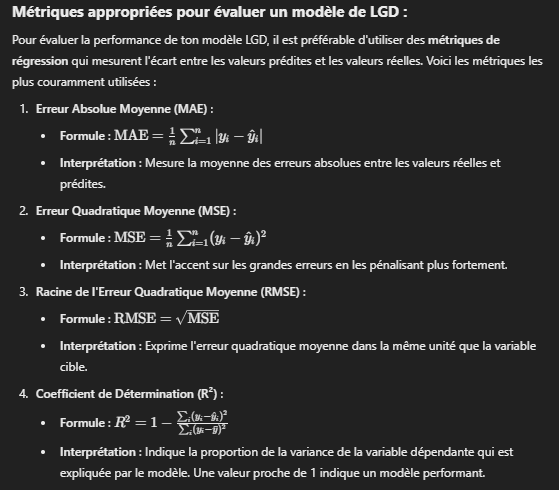



In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_true = df_actual_predicted_probs['lgd_targets_test_temp'].values
y_pred = df_actual_predicted_probs['lgd_predictions_proba'].values

# MAE
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# MSE
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# R²
r2 = r2_score(y_true, y_pred)
print(f"Coefficient of Determination (R²): {r2:.4f}")

Mean Absolute Error (MAE): 0.0496
Mean Squared Error (MSE): 0.0057
Root Mean Squared Error (RMSE): 0.0755
Coefficient of Determination (R²): 0.3553


Interprétation des résultats :
MAE : Plus la MAE est faible, plus les prédictions sont proches des valeurs réelles en moyenne.
RMSE : Comme la RMSE pénalise davantage les grandes erreurs, une valeur faible indique que le modèle n'a pas de grandes erreurs de prédiction.
R² : Une valeur proche de 1 signifie que le modèle explique bien la variance des données. Une valeur négative ou proche de 0 indique que le modèle n'explique pas bien les données.

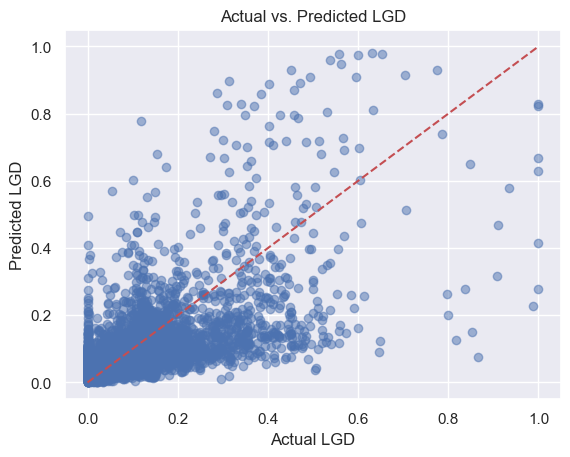

In [33]:
import matplotlib.pyplot as plt

plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')  # Ligne y = x for ref
plt.xlabel('Actual LGD')
plt.ylabel('Predicted LGD')
plt.title('Actual vs. Predicted LGD')
plt.show()

## Interpretation of each metric :
1. Mean Absolute Error (MAE): 0.0496
Interpretation: MAE measures the mean absolute error between predictions and actual values.  
A MAE of 0.0496 means that, on average, your model's predictions deviate from the actual values by 4.96%.
Evaluation: Given that the LGD varies between 0 and 1 (0% to 100%), an average error of less than 5% is relatively low, which is positive.

2. Mean Squared Error (MSE): 0.0057
Interpretation: MSE is the mean squared error between predictions and actual values.  
It penalizes larger errors.
Assessment: An MSE of 0.0057 is quite low, indicating that large errors are rare in your model.

3. Root Mean Squared Error (RMSE): 0.0755
Interpretation: RMSE is the square root of MSE.  
It is expressed in the same units as the LGD.  
An RMSE of 0.0755 means that the standard deviation of residuals is 7.55%.
Assessment: An RMSE of less than 10% is generally considered acceptable in financial models, but this depends on the context and industry standards.

4. Coefficient of Determination (R²) : 0.3553
Interpretation: The R² indicates the proportion of LGD variance that is explained by your model.  
An R² of 0.3553 means that your model explains around 35.53% of total LGD variability.
Assessment: An R² of 35% is relatively low, suggesting that the model doesn't capture much of the variance in the data.

## Overall analysis:

#### Low errors but low R²:
Although the mean errors are low (MAE and RMSE), the low R² indicates that the model fails to explain much of the LGD variance in the test data.

#### Possible explanation: 
This may indicate that the model is accurate on average (predicts values close to the true mean), but does not capture well the specific variations in LGD for different observations.

## Detailed interpretation:

#### LGD distribution:
Low variance: If the LGD is highly concentrated around a mean value (for example, most observations have an LGD close to 0.05), the model may obtain low mean errors by simply predicting this mean, which would explain the low R².
Verification: I recommend plotting the histogram of the actual LGD to check its distribution.
Limited predictive ability:
Missing variables: The low R² suggests that some important explanatory variables for LGD are not included in the model.
Complexity of the phenomenon: LGD is influenced by many factors, including macroeconomic variables, specific loan characteristics, and legal aspects of collection.

## Recommendations for improving the model :

#### Add relevant explanatory variables:
Collateral quality: If possible, include information on collateral associated with loans.
Type of financial product: Different types of loans may have different LGDs.
Collection history : Variables indicating the efficiency of the collection process may be useful.

#### Analyze model residuals :
Residuals plot: Plots residuals (error between actual and predicted values) against predicted values to detect patterns.
Heteroskedasticity: Checks whether the variance of residuals is constant.  
Heteroscedasticity may indicate that the model is not well specified.

#### Use more complex models :
Non-linear models: Consider using models such as decision trees, random forests or gradient boosting (e.g. XGBoost), which can capture non-linear relationships.
Neural networks: These can be useful if you have a large volume of data and complex relationships.

#### Cross-validation:
Model robustness: Use cross-validation to evaluate model performance on different subsets of the data.
Avoid overlearning: Make sure the model generalizes well and isn't overlearned on training data.

#### Segment data:
Clustering:Group loans into homogeneous segments (e.g. by industry, loan amount, etc.) and train specific models for each segment.
Benefit: This can improve accuracy by capturing segment-specific patterns.

#### Feature Engineering:
Create new variables: Combine or transform existing variables to extract more information.
Interaction between variables: Consider including interaction terms if this makes sense.
